In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\irfan\\Downloads\\Employee.csv")
data.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


 ## 1.DATA EXPLORATION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [4]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [5]:
unique_values= data.nunique()
print("Unique Values in Each Feature:")
print(unique_values)

Unique Values in Each Feature:
Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [7]:

# Rename columns if needed
data = data.rename(columns={'Place': 'Location', 'Salary': 'Salary_INR'})
data.head()

,Company,Age,Salary_INR,Location,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


## 2.DATA CLEANING

In [8]:
#Replacing 0 in Age with NaN:
#Replace the value 0 in the 'Age' column with NaN.
data['Age'].replace(0, np.nan, inplace=True)


In [10]:
#Treating Null Values:
# Replace missing values in 'Salary' with the mean of the column
mean_salary = data['Salary_INR'].mean()
data['Salary_INR'].fillna(mean_salary, inplace=True)

In [ ]:
#Removing duplicate rows
data.drop_duplicates(inplace=True)


In [11]:
# Finding outliers
Q1 = data['Salary_INR'].quantile(0.25)
Q3 = data['Salary_INR'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = data[(data['Salary_INR'] < lower_bound) | (data['Salary_INR'] > upper_bound)]

outliers

,Company,Age,Salary_INR,Location,Country,Gender


In [15]:
# Define lower and upper percentiles
lower_percentile = 5  # 5th percentile
upper_percentile = 95  # 95th percentile

# Calculate the lower and upper percentile values
lower_bound = np.percentile(data['Salary_INR'], lower_percentile)
upper_bound = np.percentile(data['Salary_INR'], upper_percentile)

print('lower percentile is ;',lower_bound)
print('upper percentile is ;',upper_bound)



lower percentile is ; 1514.0000000000005
upper percentile is ; 9024.0


In [24]:
# Identify  outliers
outliers = data[(data['Salary_INR'] < lower_bound) | (data['Salary_INR'] > upper_bound)]
outliers


,Company,Age,Salary_INR,Location,Country,Gender
11,CTS,34.0,1089.0,Calcutta,India,0
13,CTS,18.0,1234.0,Mumbai,India,0
27,CTS,45.0,9284.0,Delhi,India,1
28,CTS,23.0,9876.0,Mumbai,India,1
47,CTS,32.0,1089.0,Mumbai,India,0
49,CTS,19.0,1234.0,Cochin,India,0
63,CTS,41.0,9284.0,NaN,India,1
83,CTS,33.0,1089.0,Chennai,India,0
85,CTS,17.0,1234.0,Calcutta,India,0
99,CTS,44.0,9284.0,Podicherry,India,1


In [ ]:
# Create a boolean filter for removing outliers
outlier_filter = (df['Salary_INR'] >= lower_bound) & (df['Salary_INR'] <= upper_bound)

In [27]:
# Apply the filter to remove outliers
filtered_data = data[outlier_filter]
filtered_data

,Company,Age,Salary_INR,Location,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


## 3.DATA ANALYSIS

In [ ]:
#Filter the data with age > 40 and salary < 5000.
#Plot a chart with age and salary.
#Count the number of people from each place and represent it visually.

In [28]:
# Filter data
filtered_data = data[(data['Age'] > 40) & (data['Salary_INR'] < 5000)]
filtered_data

,Company,Age,Salary_INR,Location,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


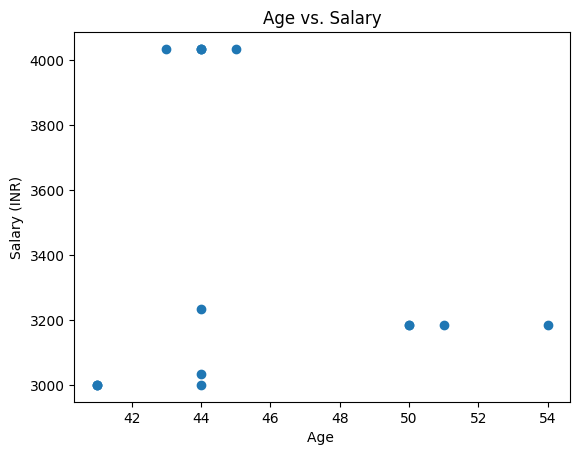

In [29]:
# Plot age vs. salary
import matplotlib.pyplot as plt
plt.scatter(filtered_data['Age'], filtered_data['Salary_INR'])
plt.xlabel('Age ')
plt.ylabel('Salary (INR)')
plt.title('Age vs. Salary')
plt.show()

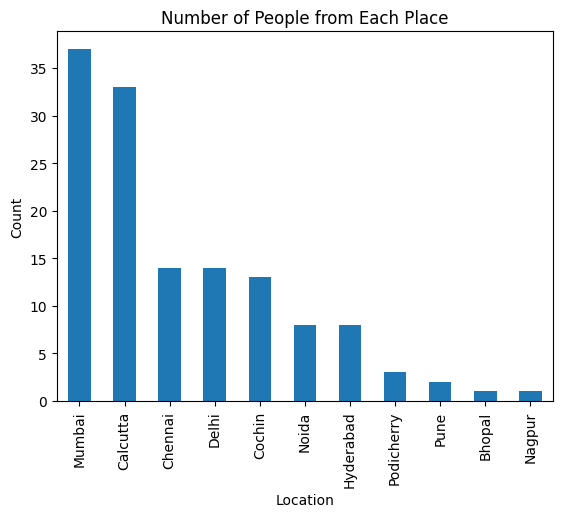

In [31]:
# Count people from each place and represent visually
place_counts = data['Location'].value_counts()
place_counts.plot(kind='bar', title='Number of People from Each Place')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

## 4.Data Encoding and Feature scailing

In [39]:


# Create a DataFrame 'data' with the necessary columns

# Perform one-hot encoding for categorical columns 
data_encoded = pd.get_dummies(data, columns=['Company', 'Country'])

# Use LabelEncoder for binary encoding on 'Gender' in the 'data' DataFrame
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Perform feature scaling using StandardScaler for numeric columns in the 'data_encoded' DataFrame
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_encoded[['Age', 'Salary_INR']])
data_encoded[['Age', 'Salary_INR']] = scaled_features

# Using MinMaxScaler to scale 'Age' in 'data_encoded'
scaler = MinMaxScaler()
data_encoded[['Age']] = scaler.fit_transform(data_encoded[['Age']])

(data_encoded.head())



,Age,Salary_INR,Location,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Country_India
0,0.081081,0.000000,Chennai,0,False,False,False,False,True,False,True
1,0.351351,0.000000,Mumbai,0,False,False,True,False,False,False,True
2,0.486486,-1.283902,Calcutta,0,False,False,False,False,True,False,True
3,0.621622,-0.985565,Delhi,0,False,False,True,False,False,False,True
4,0.162162,-0.559369,Mumbai,0,False,False,False,False,True,False,True
